In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from collections import Counter

[222.20524428507395, 167.03629929221435, 111.45190428041793, 62.05215719063545, 19.998537549407114] [7.3474907410007795, 5.981890166579856, 3.672857784839497, 3.8251201081158013, 4.24021284558485]


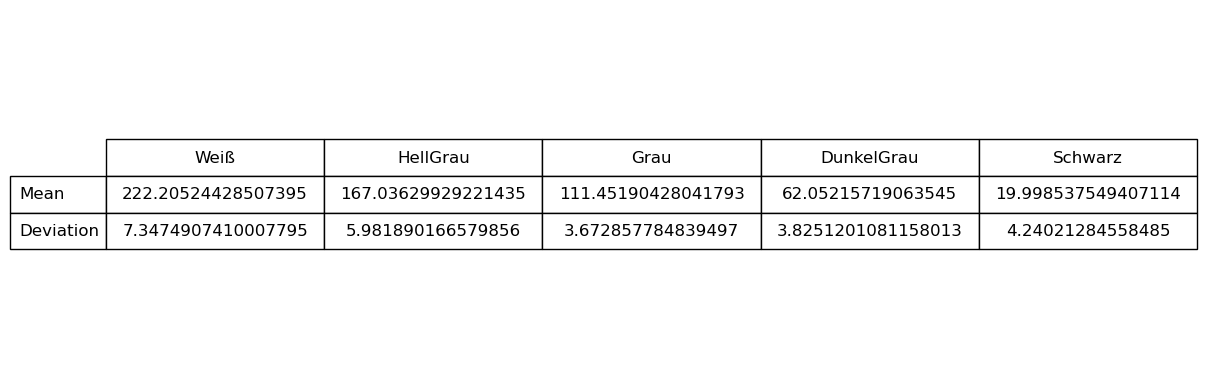

In [161]:
def readImg(path:str, x1=0, x2=-1, y1=0, y2=-1):
    M = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return M[y1:y2, x1:x2]

imgList=[]
imgList.append(readImg("./Bilder/grayscalePic.png",10, 107, 10,470))
imgList.append(readImg("./Bilder/grayscalePic.png",127, 256, 10,470))
imgList.append(readImg("./Bilder/grayscalePic.png",276, 405, 10,470))
imgList.append(readImg("./Bilder/grayscalePic.png",425, 555, 10,470))
imgList.append(readImg("./Bilder/grayscalePic.png",575, 630, 10,470))
meanList=[]
deviationList=[]
for img in imgList:
    # print(format(img.shape))
    # plt.imshow(img, cmap='gray')
    # plt.xticks([]), plt.yticks([]) 
    # cv2.imshow("titel",img)
    # cv2.waitKey(0) 
    # cv2.destroyAllWindows()
    # plt.show()
    grauwerte= []
    for pixel in img.flatten():
        grauwerte.append(float(pixel))
    meanList.append(float(np.mean(grauwerte)))
    deviationList.append(float(np.std(grauwerte)))
print(meanList,deviationList)
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=[meanList,deviationList], loc='center', cellLoc='center', colLabels=("Weiß","HellGrau","Grau","DunkelGrau","Schwarz"),rowLabels=("Mean","Deviation"))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.2, 2.2)  # Adjust the size of the table
plt.show()


In [158]:
def readImgDouble(path:str):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    return img.astype(float)

blackImgs=[]

for i in range(1,11):
    blackImgs.append(readImgDouble("./Bilder/Black"+str(i)+".png"))

def pixelMeanFunc(imgListe):
    PixelMeanIMG=[]
    for i in range(len(blackImgs[0])):
        PixelMeanList=[]
        for j in range(len(blackImgs[0][0])):
            pixelValues=[]
            for img in imgListe:
                pixelValues.append(img[i][j])
            PixelMeanList.append(float(np.mean(pixelValues)))
        PixelMeanIMG.append(PixelMeanList)
    return PixelMeanIMG
darkpixelMeanIMG=pixelMeanFunc(blackImgs)

480
640


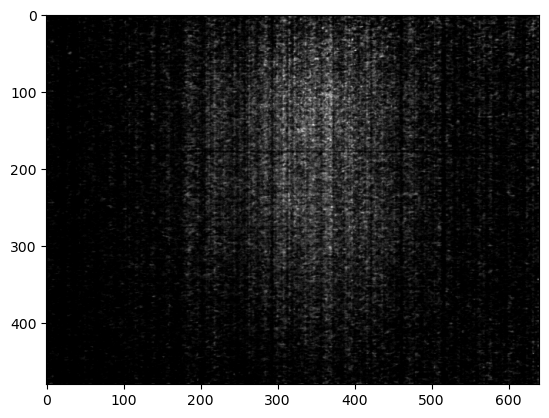

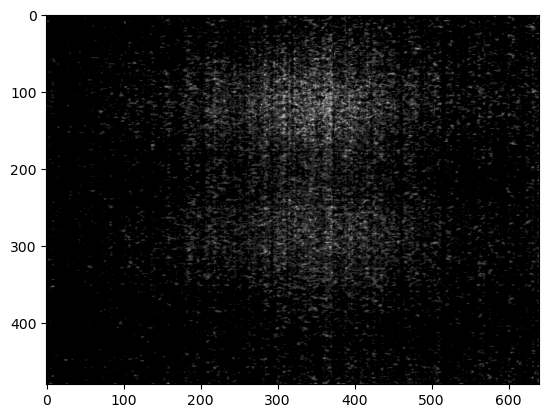

In [159]:
print(len(darkpixelMeanIMG))
print(len(darkpixelMeanIMG[0]))
plt.imshow(darkpixelMeanIMG, cmap='gray')
plt.show()
plt.imshow(blackImgs[0], cmap='gray')
plt.show()

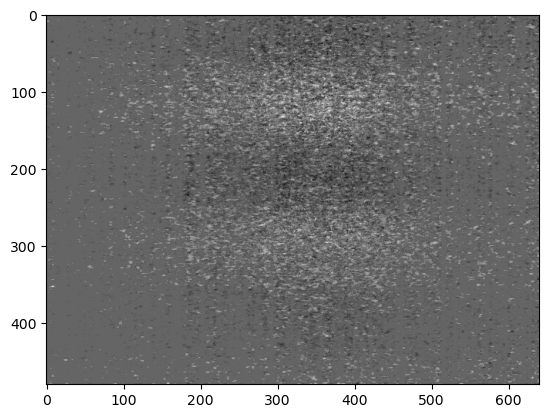

In [167]:
def subtractIMG(inputIMG,darkimg=darkpixelMeanIMG):
    if(len(inputIMG)>len(darkimg)):
        return NULL
    diffIMG=[]
    for i in range(len(img)):
        diffROW=[]
        for j in range(len(img[i])):
            diffROW.append(img[i][j]-darkimg[i][j])
        diffIMG.append(diffROW)
    return diffIMG

plt.imshow(subtractIMG(blackImgs[0]), cmap='gray')
plt.show()

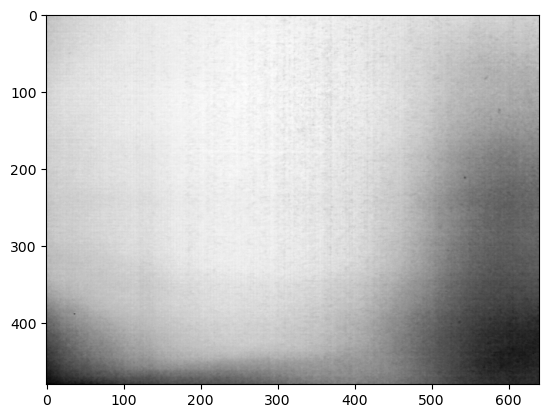

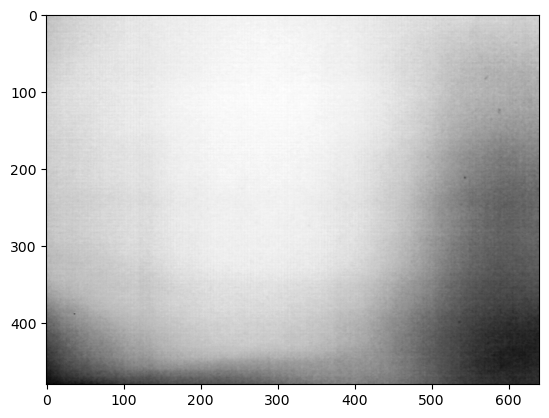

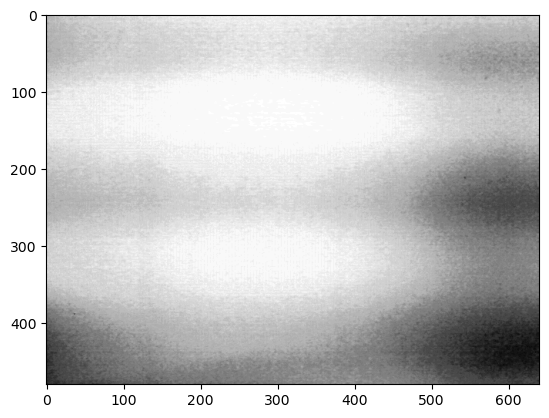

In [166]:
whiteImgs=[]

for i in range(1,11):
    whiteImgs.append(readImgDouble("./Bilder/White"+str(i)+".png"))

whitePixelMean=pixelMeanFunc(whiteImgs)
plt.imshow(subtractIMG(whitePixelMean), cmap='gray')
plt.show()
plt.imshow(whitePixelMean,cmap='gray')
plt.show()
plt.imshow(whiteImgs[0],cmap='gray')
plt.show()

226.94151041666666


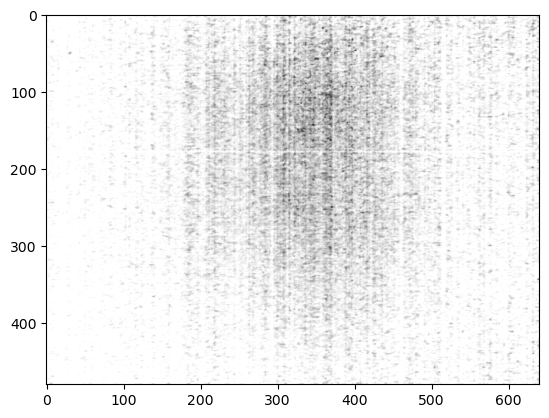

In [192]:
def subtractWHITE(img,darkimg=darkpixelMeanIMG):
    if(len(img)>len(darkimg)):
        return NULL
    meanList=[]
    for i in range(len(whitePixelMean)):
        meanRow=[]
        for j in range(len(whitePixelMean[i])):
            meanRow.append(whitePixelMean[i][j])
        meanList.append(np.mean(meanRow))
    whiteMean=np.mean(meanList)
    print(whiteMean)
    diffIMG=[]
    for i in range(len(img)):
        diffROW=[]
        for j in range(len(img[i])):
            diffROW.append((img[i][j]-darkimg[i][j])/(whitePixelMean[i][j]/whiteMean))
        diffIMG.append(diffROW)
    return diffIMG
sub=subtractWHITE(whitePixelMean)
plt.imshow(sub,cmap='gray')
plt.show()

226.94151041666666


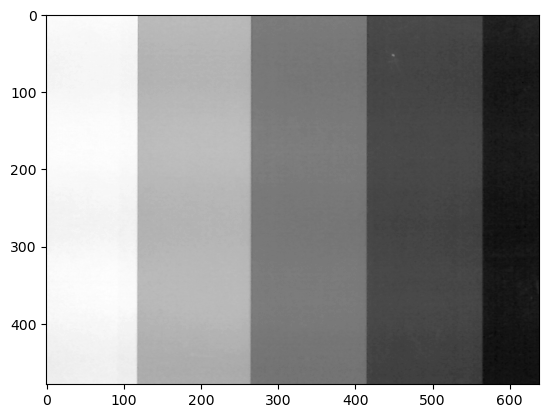

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [208]:
sub=subtractWHITE(readImg(path="./Bilder/grayscalePic.png"))
plt.imshow(sub,cmap='gray')
plt.show()
for i in range(len(sub)):
    for j in range(len(sub)):
        sub[i][j]/=255
        if(sub[i][j]>255):
            sub[i][j]=255
cv2.imwrite("./Bilder/BetterGrayscalePic.png",sub)